In [1]:
from utils import *
from Agents import *
import torch
import numpy as np
import matplotlib.pyplot as plt


env = Markov_chain('env0')

nb_itérations = 20000
reward = np.zeros((1,env.rewards.shape[1]))
S = []
env.reset()

"""
Standar QL paramètre du papier:
epsilon  : 0.5
alpha    : 0.7
discount : 0.9
"""

agent = Switch_Ql_agent(env, epsilon = 0.5, alpha = 0.2, 
                         discount=0.90, scal = [1, 1])
average_stay_state = [[0, 0,0]]
for i in range(nb_itérations):
    s = env.current_state
    new_s, r = env.action(agent.act())
    agent.store(s, r, new_s)
    if agent.time_to_learn():
        agent.learn()

    if i % 2000 == 0 and i!=0:
        agent.epsilon /= 2
        
    asa = average_stay_state[-1].copy()
    asa[int(new_s[1])] += 1

    average_stay_state += [asa]
    
    S += [s]
    reward = np.concatenate((reward,r), axis = 0)

print(reward)

[[ 0.     0.   ]
 [-0.001 -0.001]
 [ 0.1   -0.09 ]
 ...
 [-0.018  0.02 ]
 [-0.018  0.02 ]
 [-0.001 -0.001]]


In [2]:
np.zeros(2)+ [1,0]

array([1., 0.])

In [2]:
###Plot

c = np.cumsum(reward, axis = 0)
r1 = [c[o,0] if o - 1000 < 0 else c[o,0] - c[o-1000, 0] for o,i in enumerate(c)]
r2 = [c[o,1] if o - 1000 < 0 else c[o,1] - c[o-1000, 1] for o,i in enumerate(c)]

average1000_r1 = [sum(r1[:i])/1000 \
                  if i < 1000 else sum(r1[i-1000:i])/1000 \
                         for i, r in enumerate(r1) ]

average1000_r2 = [sum(r2[:i])/1000 \
                  if i < 1000 else sum(r2[i-1000:i])/1000 \
                         for i, r in enumerate(r2) ]

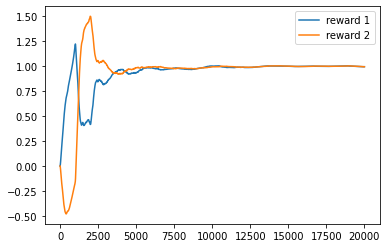

In [3]:
plt.plot(average1000_r1, label="reward 1")
plt.plot(average1000_r2, label="reward 2")
plt.legend()
plt.show()
print()

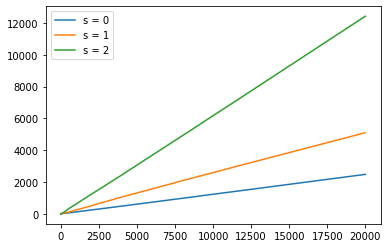

In [4]:
average_stay_state = np.array(average_stay_state)
plt.plot(average_stay_state[:,0], label="s = 0")
plt.plot(average_stay_state[:,1], label="s = 1")
plt.plot(average_stay_state[:,2], label="s = 2")
plt.legend()
plt.show()

In [3]:
env.states.index('V0')

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [13]:
ag = Standar_Ql_agent(env, epsilon = 0.2, alpha = 0.1, 
                         discount=0.90, scal = [1, 1])

In [9]:
env.transitions.shape

3 3


In [12]:
print(*env.states.shape)

3


In [7]:
env.transitions[0]

array([1., 1., 0.])

In [20]:
a = np.where(env.transitions[2])[0]

In [16]:
ag.Q_values

array([[ 0.65911506, -0.35132748,  0.41239271],
       [-1.44678249, -0.07235184, -0.59470447],
       [-0.17802095, -1.94875484, -0.08690134]])

In [21]:
ag.Q_values[2][a]

array([-1.94875484, -0.08690134])

In [22]:
env.actions_possibles()

array(['V0', 'V2'], dtype='<U13')

In [23]:
np.random.choice(env.actions_possibles())

'V0'